# IFN704_Sem2_2020 Very Short-term Forecasting Model for Residential PV Power Generation Using Artificial Neural Networks

Pattarachai Roongsritong n10548467 QUT

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

https://github.com/gweissman/clinical_embeddings

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

Training Set

In [ ]:
df_train = pd.read_csv("/Users/stamp/Desktop/Semester1-2021/IFN704/data/drugsCom_raw/drugsComTrain_raw.tsv",sep="\t")
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [ ]:
# drop the columns that are not relevant
df_train = df_train.drop(columns=['Unnamed: 0', 'drugName', 'condition', 'date', 'usefulCount']) 

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


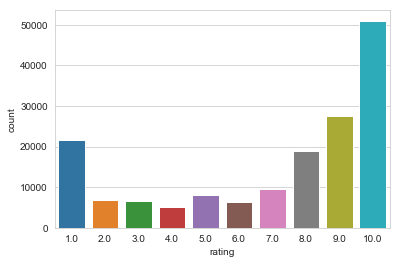

In [ ]:
target_train = df_train['rating']
sns.set_style('whitegrid')
sns.countplot(target_train)

In [ ]:
# Giving the Sentiment according to their ratings
df_train['rating'] = df_train['rating'].apply(lambda x: 1 if x > 5 else 0)
df_train.head()

,review,rating
0,"""It has no side effect, I take it in combinati...",1
1,"""My son is halfway through his fourth week of ...",1
2,"""I used to take another oral contraceptive, wh...",0
3,"""This is my first time using any form of birth...",1
4,"""Suboxone has completely turned my life around...",1


/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


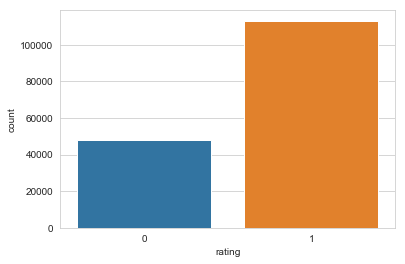

In [ ]:
sns.set_style('whitegrid')
sns.countplot(df_train['rating'])

Test Set

In [ ]:
df_test = pd.read_csv("/Users/stamp/Desktop/Semester1-2021/IFN704/data/drugsCom_raw/drugsComTest_raw.tsv",sep="\t")
df_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
# drop the columns that are not relevant
df_test = df_test.drop(columns=['Unnamed: 0', 'drugName', 'condition', 'date', 'usefulCount']) 

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


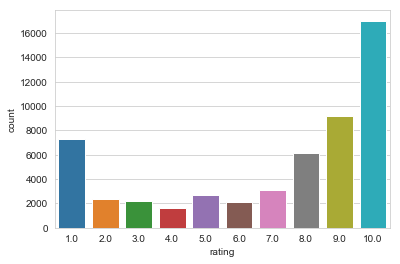

In [ ]:
target_test = df_test['rating']
sns.set_style('whitegrid')
sns.countplot(target_test)

In [ ]:
# Giving the Sentiment according to their ratings
df_test['rating'] = df_test['rating'].apply(lambda x: 1 if x > 5 else 0)
df_test.head()

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",1
1,"""My son has Crohn&#039;s disease and has done ...",1
2,"""Quick reduction of symptoms""",1
3,"""Contrave combines drugs that were used for al...",1
4,"""I have been on this birth control for one cyc...",1


/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


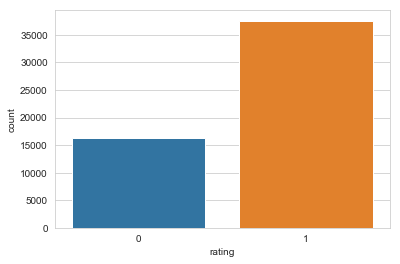

In [ ]:
sns.set_style('whitegrid')
sns.countplot(df_test['rating'])

In [ ]:
# X_train = df_train.loc[:, 'review'].values
# y_train = df_train.loc[:, 'rating'].values
# X_test = df_test.loc[:, 'review'].values
# y_test = df_test.loc[:, 'rating'].values

Combine the two data sets

In [ ]:
df = df_train.append(df_test)
df.head()

,review,rating
0,"""It has no side effect, I take it in combinati...",1
1,"""My son is halfway through his fourth week of ...",1
2,"""I used to take another oral contraceptive, wh...",0
3,"""This is my first time using any form of birth...",1
4,"""Suboxone has completely turned my life around...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  215063 non-null  object
 1   rating  215063 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.9+ MB


# Plot bar chart 0 and 1 class + wordcloud + top 10 for each class

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


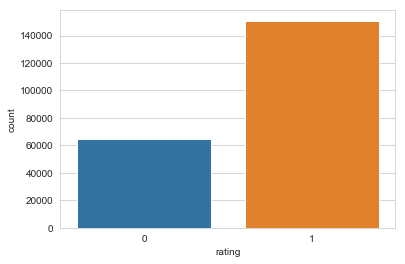

In [ ]:
sns.set_style('whitegrid')
sns.countplot(df['rating'])

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Word Cloud Positive

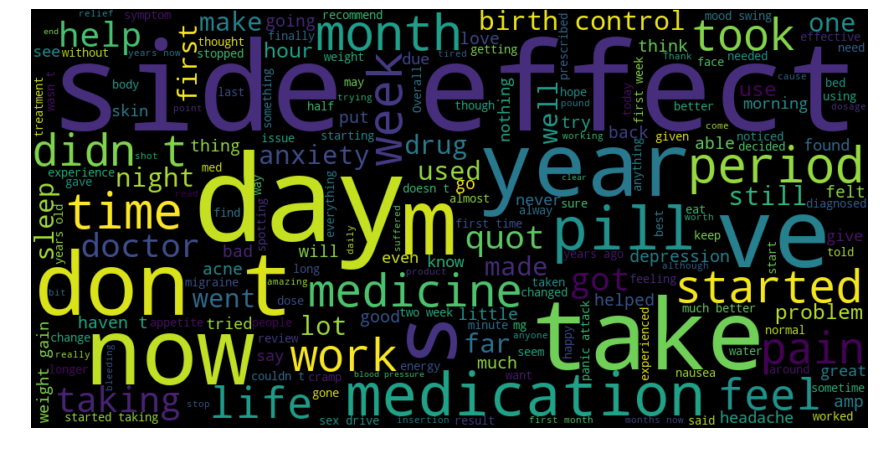

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_rate_positive = df.loc[df.rating == 1, 'review']
k1 = (' '.join(df_rate_positive))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

## Word Cloud Negative

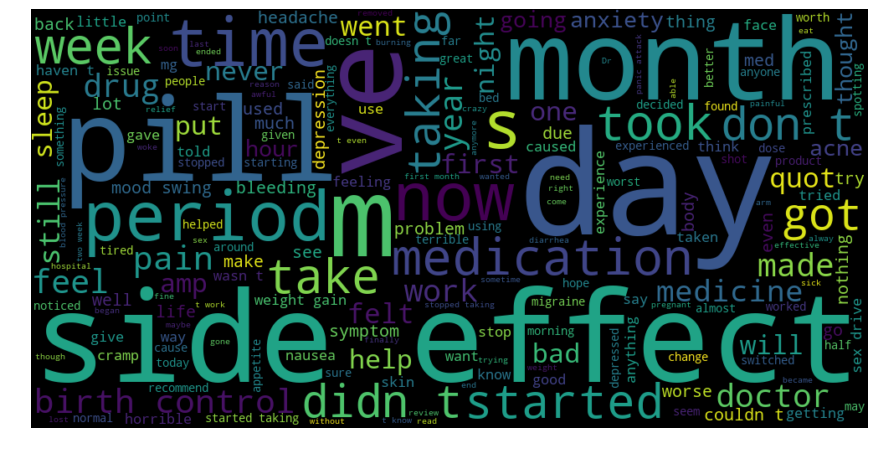

In [ ]:
df_rate_negative = df.loc[df.rating == 0, 'review']
k1 = (' '.join(df_rate_negative))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob
df['polarity']=df['review'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['review']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:

D.T."
Review 2:
 "Best medicine I ever seen."
Review 3:
 "It has been excellent in curing my symptoms."


In [ ]:
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['review']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 "I took this for restless leg syndrome and I had terrible involuntary muscle spasms and leg and arm movement. I had to go to the ER. It was terrible."
Review 2:
 "So I&#039;ve had the implant since June 2015 and I haven&#039;t stopped bleeding it&#039;s so annoying the reason I got it was so I wouldn&#039;t worry about getting a period every month but I&#039;ve been on my period since I got it ! idk whether to leave it or just take it off ."
Review 3:
 "Drug works but the patch is horrible.  It is plastic and wrinkles up.  The edges don&#039;t adhere well so the patch is always sticking to my clothes.  I hope they fix this issue.  If they do I will buy again but for now I&#039;m going to save my money."


# Down sizing Data set

In [ ]:
df = df.sample(frac=0.05, random_state=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10753 entries, 41735 to 150409
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   review    10753 non-null  object 
 1   rating    10753 non-null  int64  
 2   polarity  10753 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 336.0+ KB


In [ ]:
df.rating.unique()

array([0, 1])

In [ ]:
type(df.review)

pandas.core.series.Series

In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

review_lines = list()
lines = df['review'].values.tolist()
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

for line in lines:   
    tokens = word_tokenize(line)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word    
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words    
#     stop_words = set(stopwords.words('english'))
#     words = [w for w in words if not w in stop_words]
    # Stemming 
    # words = [stemmer.stem(w) for w in words]
    # Lemmatisation
#     words = [lemmatizer.lemmatize(w) for w in words]
    review_lines.append(words)
  
len(review_lines)

[nltk_data] Downloading package punkt to /Users/stamp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/stamp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/stamp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


10753

In [ ]:
from statistics import mean
print(mean([len(i) for i in review_lines]))

83.76341486096904


In [ ]:
review_lines

[['took',
  'this',
  'an',
  'hour',
  'after',
  'he',
  'came',
  'inside',
  'of',
  'me',
  'went',
  'to',
  'cvs',
  'and',
  'the',
  'pharmacist',
  'told',
  'me',
  'they',
  'were',
  'the',
  'same',
  'they',
  'are',
  'not',
  'the',
  'same',
  'now',
  'weeks',
  'pregnant',
  'gt'],
 ['an',
  'incredible',
  'birth',
  'control',
  'do',
  'not',
  'be',
  'turned',
  'off',
  'by',
  'people',
  'saying',
  'they',
  'bled',
  'or',
  'spotted',
  'for',
  'weeks',
  'or',
  'months',
  'this',
  'is',
  'only',
  'because',
  'it',
  'must',
  'be',
  'started',
  'at',
  'a',
  'specific',
  'point',
  'in',
  'your',
  'cycle',
  'it',
  'stopped',
  'my',
  'period',
  'for',
  'three',
  'months',
  'without',
  'any',
  'spotting',
  'until',
  'it',
  'was',
  'finally',
  'due',
  'my',
  'only',
  'complaint',
  'is',
  'that',
  'the',
  'bleeding',
  'lasted',
  'a',
  'few',
  'days',
  'longer',
  'than',
  'usual',
  'but',
  'that',
  'is',
  'it',
  

Develop a pre-trained embedding layer using Word2Vec

In [ ]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim 

EMBEDDING_DIM = 100
# # train word2vec model
# # model = gensim.models.Word2Vec(sentences=review_lines, size=EMBEDDING_DIM, window=5, workers=4, min_count=1)
# model = gensim.models.KeyedVectors.load_word2vec_format('/Users/stamp/Desktop/Semester1-2021/IFN704/GoogleNews-vectors-negative300.bin', binary = True)
model = gensim.models.Word2Vec.load('/Users/stamp/Desktop/Semester1-2021/IFN704/W2V_100/w2v_oa_all_100d.bin')
# # # vocab size
words = list(model.wv.index_to_key)
print('Vocabulary size: %d' % len(words))

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Vocabulary size: 3748342


In [ ]:
model.wv.most_similar('sideeffect')#, topn =1)

[('emphatic.', 0.8494895696640015),
 ('classes.most', 0.8362025618553162),
 ('effects)._because', 0.83547443151474),
 ('paresthesia”', 0.833727240562439),
 ('tomap', 0.8319109082221985),
 ('patients.simulation', 0.8307254910469055),
 ('pre-occupying', 0.8303970098495483),
 ('“headline”', 0.830180287361145),
 ('names.•', 0.8286046981811523),
 ('unchanging)', 0.8279871940612793)]

In [ ]:
model.wv.most_similar('pain')#, topn =1)

[('pain_and', 0.9086359739303589),
 ('pain_intensity', 0.8848637938499451),
 ('acute_pain', 0.8739394545555115),
 ('ongoing_pain', 0.8737969994544983),
 ('persistent_pain', 0.8737456798553467),
 ('pain,', 0.8705431818962097),
 ('pain_or', 0.8694646954536438),
 ('chronic_pain', 0.8577300906181335),
 ('intensity_of_pain', 0.8502391576766968),
 ('back_pain', 0.8502222895622253)]

In [ ]:
model.wv.most_similar('cramp')#, topn =1)

[('cramp,', 0.7645677924156189),
 ('cramp.', 0.7473682165145874),
 ('writer’s', 0.7147056460380554),
 ('muscle_pain', 0.6564078330993652),
 ('cramping', 0.6555342674255371),
 ('hemiplegic', 0.655203640460968),
 ('flat-arched', 0.6536697149276733),
 ('movement-evoked', 0.6526197195053101),
 ('spasticity_and', 0.6497231721878052),
 ('limping', 0.6473642587661743)]

In [ ]:
# save model in ASCII (word2vec) format
# filename = 'drug_review_embedding_word2vec2.txt'
# model.wv.save_word2vec_format(filename, binary=False)

Start Building a classifier

In [ ]:
import os

embeddings_index = {}
f = open(os.path.join('', 'drug_review_embedding_word2vec2.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [ ]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# VALIDATION_SPLIT = 0.3
max_length = 100

X_train, X_test, y_train, y_test = train_test_split(
    review_lines, df['rating'].values, test_size=0.3, 
    shuffle = True, random_state=0)

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(X_train)
X_train_seq = tokenizer_obj.texts_to_sequences(X_train)
X_test_seq = tokenizer_obj.texts_to_sequences(X_test)

# pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

# review_pad = pad_sequences(sequences, maxlen=max_length)
# sentiment =  df['rating'].values
# print('Shape of review tensor:', review_pad.shape)
# print('Shape of sentiment tensor:', sentiment.shape)

# split the data into a training set and a validation set
# indices = np.arange(review_pad.shape[0])
# np.random.shuffle(indices)
# review_pad = review_pad[indices]
# sentiment = sentiment[indices]
# num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

# X_train_pad = review_pad[:-num_validation_samples]
# y_train = sentiment[:-num_validation_samples]
# X_test_pad = review_pad[-num_validation_samples:]
# y_test = sentiment[-num_validation_samples:]

# X_train_pad, X_test_pad, y_train, y_test = train_test_split(
#     review_pad, sentiment, test_size=0.2, 
#     shuffle = True, random_state=42, stratify = sentiment)

Found 14725 unique tokens.


In [ ]:
X_train_pad

array([[   0,    0,    0, ...,  107,    8,   16],
       [ 614,    2,    6, ...,   93,  382, 8255],
       [   0,    0,    0, ...,  706,    4, 1141],
       ...,
       [   0,    0,    0, ...,  159,  264,  358],
       [   0,    0,    0, ...,  729,    7, 1931],
       [   0,    0,    0, ...,  130,   60,   90]], dtype=int32)

In [ ]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (7527, 100)
Shape of y_train tensor: (7527,)
Shape of X_test_pad tensor: (3226, 100)
Shape of y_test tensor: (3226,)


In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Handle imbalanced classes with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train_pad, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test_pad, y_test)

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


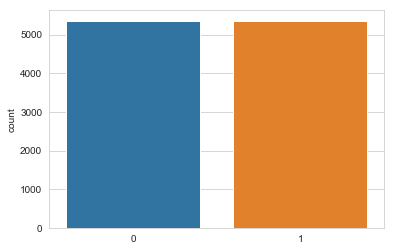

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y_train_sm)

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


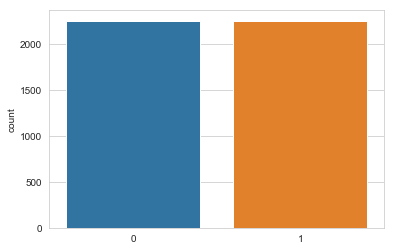

In [ ]:
sns.set_style('whitegrid')
sns.countplot(y_test_sm)

In [ ]:
print('Shape of X_train_pad tensor:', X_train_sm.shape)
print('Shape of y_train tensor:', y_train_sm.shape)

print('Shape of X_test_pad tensor:', X_test_sm.shape)
print('Shape of y_test tensor:', y_test_sm.shape)

Shape of X_train_pad tensor: (10716, 100)
Shape of y_train tensor: (10716,)
Shape of X_test_pad tensor: (4516, 100)
Shape of y_test tensor: (4516,)


In [ ]:
from sklearn.model_selection import train_test_split
X_val, X_test_sm, y_val, y_test_sm = train_test_split(
                                    X_test_sm, y_test_sm, test_size=0.33, random_state=42, shuffle = True)

In [ ]:
EMBEDDING_DIM =100
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
print(num_words)

14726


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, LSTM, Dropout, BatchNormalization, GlobalMaxPooling1D, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant

# define model
model = Sequential()
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=max_length,
                            trainable=False)

model.add(embedding_layer)
model.add(Conv1D(filters=256, kernel_size=6 ,padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(SpatialDropout1D(0.5))
model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.25))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.25))
model.add(Dense(32, activation=None))
# model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation=None))
# model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
history = model.fit(X_train_sm, y_train_sm, batch_size=64, epochs=15, validation_data=(X_val, y_val), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1472600   
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 256)          153856    
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 256)          1024      
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 128)           197120    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                4

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 27074667297682800
]


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


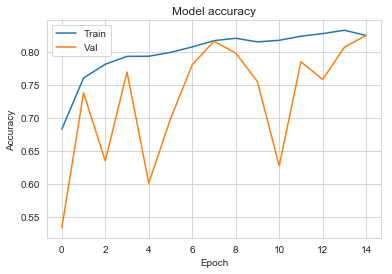

In [ ]:
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

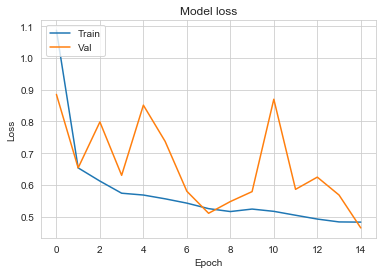

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_sm, y_test_sm, batch_size=128)
print('Accuracy: %f' % (accuracy*100))

12/12 [==============================] - 2s 138ms/step - loss: 0.5029 - accuracy: 0.8028
Accuracy: 80.281693


In [ ]:
yhat = model.predict(X_test_sm)

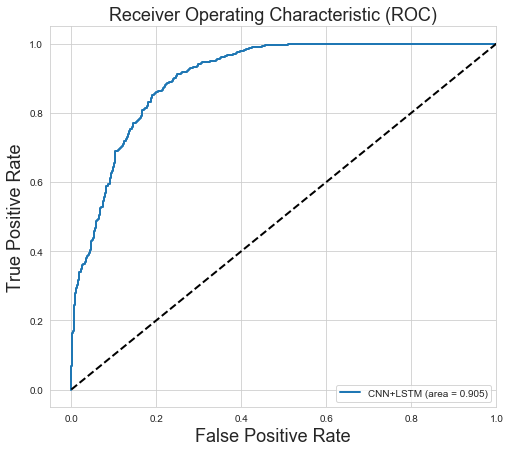

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test_sm, yhat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='CNN+LSTM (area = %0.3f)' % roc_auc, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# More accuracy metrics

In [ ]:
yhat_classes = model.predict_classes(X_test_sm)

/Users/stamp/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
yhat_1D = yhat[:, 0]
yhat_classes_1D = yhat_classes[:, 0]

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_sm, yhat_classes_1D)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_sm, yhat_classes_1D)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_sm, yhat_classes_1D)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_sm, yhat_classes_1D)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test_sm, yhat_1D)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_sm, yhat_classes)
print(matrix)

Accuracy: 0.802817
Precision: 0.728421
Recall: 0.950549
F1 score: 0.824791
ROC AUC: 0.905213
[[505 258]
 [ 36 692]]


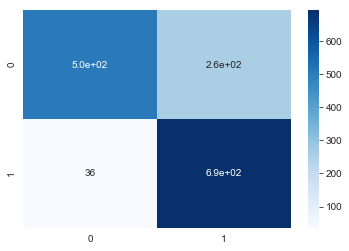

In [ ]:
sns.heatmap(matrix, annot=True, cmap='Blues')